In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [86]:
# Check available columns:
ATP2017=pd.read_csv('./tennis_atp/atp_matches_2017.csv',index_col=False,usecols=range(49))
ATP2017.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'winner_rank', 'winner_rank_points', 'loser_id', 'loser_seed',
       'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age', 'loser_rank', 'loser_rank_points', 'score', 'best_of',
       'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon',
       'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df',
       'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved',
       'l_bpFaced'],
      dtype='object')

In [89]:
# Winner of each tournament in 2017
ATP2017[ATP2017['round']=='F'][['tourney_name','winner_name']]

,tourney_name,winner_name
0,Brisbane,Grigor Dimitrov
27,Chennai,Roberto Bautista Agut
54,Doha,Novak Djokovic
85,Auckland,Jack Sock
112,Sydney,Gilles Muller
265,Australian Open,Roger Federer
266,Montpellier,Alexander Zverev
293,Quito,Victor Estrella
320,Sofia,Grigor Dimitrov
347,Buenos Aires,Alexandr Dolgopolov


In [144]:
# Pull out all Grand Slam matches
ATP2017[ATP2017['draw_size']==128][['tourney_name','winner_name']].count() #698 matches
GrandSlamMatches=ATP2017[ATP2017['draw_size']==128]
FirstWeek=GrandSlamMatches[GrandSlamMatches['round'].str.contains("R")]

Wimby1stWeek=FirstWeek[FirstWeek['tourney_name']=='Wimbledon']
Wimby1stWeek_QuarterPlayers=FirstWeek[(FirstWeek['tourney_name']=='Wimbledon')&(FirstWeek['round']=='R16')][['winner_name','winner_id']]

Wimby1stWeek_R16Win=FirstWeek[(FirstWeek['tourney_name']=='Wimbledon')&(FirstWeek['round']=='R16')][['winner_name','winner_id']]
Wimby1stWeek_R16Los=FirstWeek[(FirstWeek['tourney_name']=='Wimbledon')&(FirstWeek['round']=='R16')][['loser_name','loser_id']]
QWlist=Wimby1stWeek_R16Win.winner_id.tolist()
QLlist=Wimby1stWeek_R16Los.loser_id.tolist()

In [136]:
QWlist

[104918, 105023, 104180, 105227, 105683, 103819, 104607, 104925]

In [137]:
QLlist

[105332, 104731, 104745, 105138, 100644, 105777, 106233, 105173]

In [152]:
Wimby1stWeek_R16Win

,winner_name,winner_id
1637,Andy Murray,104918
1638,Sam Querrey,105023
1639,Gilles Muller,104180
1640,Marin Cilic,105227
1641,Milos Raonic,105683
1642,Roger Federer,103819
1643,Tomas Berdych,104607
1644,Novak Djokovic,104925


In [151]:
Wimby1stWeek_R16Los

,loser_name,loser_id
1637,Benoit Paire,105332
1638,Kevin Anderson,104731
1639,Rafael Nadal,104745
1640,Roberto Bautista Agut,105138
1641,Alexander Zverev,100644
1642,Grigor Dimitrov,105777
1643,Dominic Thiem,106233
1644,Adrian Mannarino,105173


In [305]:
Wimby1stWeek_R16WinStat=Wimby1stWeek[Wimby1stWeek['winner_id'].isin(QWlist)]
Wimby1stWeek_R16LosStat=Wimby1stWeek[Wimby1stWeek['winner_id'].isin(QLlist)]
Wimby1stWeek_R16LosStat_win=Wimby1stWeek[Wimby1stWeek['winner_id'].isin(QLlist)].mean()                             
Wimby1stWeek_R16LosStat_los=Wimby1stWeek[Wimby1stWeek['loser_id'].isin(QLlist)].mean() #missing their stats in the R16 becausethey lost

In [306]:
# Calculate percentage
Wimby1stWeek_R16WinStat['w_1st_percentage']=Wimby1stWeek_R16WinStat['w_1stIn']/Wimby1stWeek_R16WinStat['w_svpt']
Wimby1stWeek_R16WinStat['w_1st_win_percentage']=Wimby1stWeek_R16WinStat['w_1stWon']/Wimby1stWeek_R16WinStat['w_1stIn']
Wimby1stWeek_R16WinStat['w_2nd_win_percentage']=Wimby1stWeek_R16WinStat['w_2ndWon']/(Wimby1stWeek_R16WinStat['w_svpt']-Wimby1stWeek_R16WinStat['w_1stIn'])
Wimby1stWeek_R16WinStat['w_bpSaved_perct']=Wimby1stWeek_R16WinStat['w_bpSaved']/(Wimby1stWeek_R16WinStat['w_bpFaced'])


Wimby1stWeek_R16LosStat['w_1st_percentage']=Wimby1stWeek_R16LosStat['w_1stIn']/Wimby1stWeek_R16LosStat['w_svpt']
Wimby1stWeek_R16LosStat['w_1st_win_percentage']=Wimby1stWeek_R16LosStat['w_1stWon']/Wimby1stWeek_R16LosStat['w_1stIn']
Wimby1stWeek_R16LosStat['w_2nd_win_percentage']=Wimby1stWeek_R16LosStat['w_2ndWon']/(Wimby1stWeek_R16LosStat['w_svpt']-Wimby1stWeek_R16LosStat['w_1stIn'])
Wimby1stWeek_R16LosStat['w_bpSaved_perct']=Wimby1stWeek_R16LosStat['w_bpSaved']/(Wimby1stWeek_R16LosStat['w_bpFaced'])


/Users/yucheng/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/yucheng/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yucheng/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

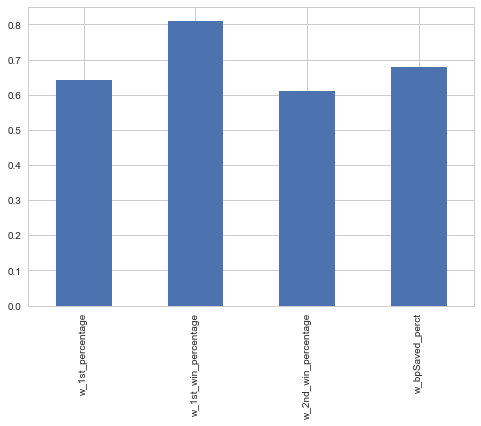

In [308]:
ax1=Wimby1stWeek_R16WinStat[['w_1st_percentage','w_1st_win_percentage','w_2nd_win_percentage','w_bpSaved_perct']].mean().plot(kind='bar') #svpt>> not percentage, but total serves

/Users/yucheng/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


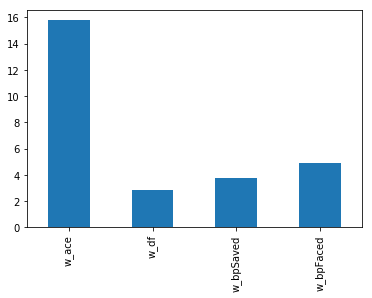

In [184]:
del Wimby1stWeek_R16WinStat['w_bpSaved_perct']
ax2=Wimby1stWeek_R16WinStat[['w_ace','w_df','w_bpSaved', 'w_bpFaced']].mean().plot(kind='bar')

In [231]:
Wimby1stWeek_R16LosStat_df['w_1st_percentage']=(Wimby1stWeek_R16LosStat_win['w_1stIn']+Wimby1stWeek_R16LosStat_los['l_1stIn'])/(Wimby1stWeek_R16LosStat_win['w_svpt']+Wimby1stWeek_R16LosStat_los['l_svpt'])

In [309]:
# Quarter Final Loser stats, plot on the same plot
Wimby1stWeek_R16LosStat_dict={}
Wimby1stWeek_R16LosStat_dict['w_1st_percentage']=(Wimby1stWeek_R16LosStat_win['w_1stIn']+Wimby1stWeek_R16LosStat_los['l_1stIn'])/(Wimby1stWeek_R16LosStat_win['w_svpt']+Wimby1stWeek_R16LosStat_los['l_svpt'])
Wimby1stWeek_R16LosStat_dict['w_1st_win_percentage']=(Wimby1stWeek_R16LosStat_win['w_1stWon']+Wimby1stWeek_R16LosStat_los['l_1stWon'])/(Wimby1stWeek_R16LosStat_win['w_1stIn']+Wimby1stWeek_R16LosStat_los['l_1stIn'])
Wimby1stWeek_R16LosStat_dict['w_2nd_win_percentage']=(Wimby1stWeek_R16LosStat_win['w_2ndWon']+Wimby1stWeek_R16LosStat_los['l_2ndWon'])/((Wimby1stWeek_R16LosStat_win['w_svpt']+Wimby1stWeek_R16LosStat_los['l_svpt'])-(Wimby1stWeek_R16LosStat_win['w_1stIn']+Wimby1stWeek_R16LosStat_los['l_1stIn']))
Wimby1stWeek_R16LosStat_dict['w_bpSaved_perct']=(Wimby1stWeek_R16LosStat_win['w_bpSaved']+Wimby1stWeek_R16LosStat_los['l_bpSaved'])/(Wimby1stWeek_R16LosStat_win['w_bpFaced']+Wimby1stWeek_R16LosStat_los['l_bpFaced'])
#Wimby1stWeek_R16LosStat_dict['w_2nd_win_percentage']=(Wimby1stWeek_R16LosStat_win['w_2ndWon']+Wimby1stWeek_R16LosStat_los['l_2ndWon'])/((Wimby1stWeek_R16LosStat_win['w_svpt']+Wimby1stWeek_R16LosStat_los['l_svpt'])-(Wimby1stWeek_R16LosStat_win['w_1stIn']+Wimby1stWeek_R16LosStat_los['l_1stIn']))



Serving_percentage_R16Win=Wimby1stWeek_R16WinStat[['w_1st_percentage','w_1st_win_percentage','w_2nd_win_percentage','w_bpSaved_perct']].mean() #svpt>> not percentage, but total serves
Serving_percentage_R16Los=Wimby1stWeek_R16WinStat[['w_1st_percentage','w_1st_win_percentage','w_2nd_win_percentage','w_bpSaved_perct']].mean() #svpt>> not percentage, but total serves

Serving_percentage_R16Win_std=Wimby1stWeek_R16WinStat[['w_1st_percentage','w_1st_win_percentage','w_2nd_win_percentage','w_bpSaved_perct']].std()
Serving_percentage_R16Los_std=Wimby1stWeek_R16LosStat[['w_1st_percentage','w_1st_win_percentage','w_2nd_win_percentage','w_bpSaved_perct']].std()



Wimby1stWeek_R16WinStat_dict=Serving_percentage_R16Win.to_dict()
Wimby1stWeek_R16LosStat_dict=Serving_percentage_R16Los.to_dict()

Wimby1stWeek_R16WinStat_std_dict=Serving_percentage_R16Win_std.to_dict()
Wimby1stWeek_R16LosStat_std_dict=Serving_percentage_R16Los_std.to_dict()

In [310]:
Serving_percentage_R16Los_std

w_1st_percentage        0.069094
w_1st_win_percentage    0.057769
w_2nd_win_percentage    0.115010
w_bpSaved_perct         0.209948
dtype: float64

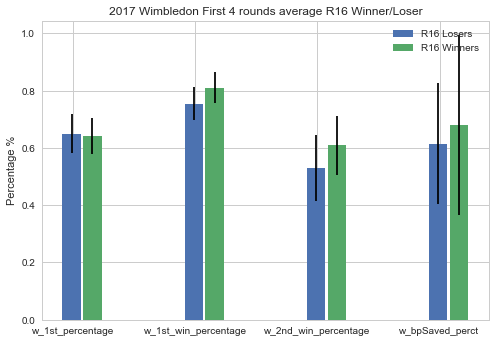

In [311]:
import seaborn as sns
sns.set(style="whitegrid")

width = 0.15       # the width of the bars

plt.bar(np.arange(len(Wimby1stWeek_R16LosStat_dict))-0.01, Wimby1stWeek_R16LosStat_dict.values(),width, align='center',yerr=Wimby1stWeek_R16LosStat_std_dict.values())
plt.bar(np.arange(len(Wimby1stWeek_R16WinStat_dict))+width+0.01, Wimby1stWeek_R16WinStat_dict.values(),width, align='center',yerr=Wimby1stWeek_R16WinStat_std_dict.values())
plt.xticks(range(len(Wimby1stWeek_R16LosStat_dict)), Wimby1stWeek_R16LosStat_dict.keys())
plt.ylabel('Percentage %')
plt.legend(['R16 Losers','R16 Winners'])
plt.title('2017 Wimbledon First 4 rounds average R16 Winner/Loser')
plt.show()


In [313]:
# 2017 Roland Garros:
RG1stWeek=FirstWeek[FirstWeek['tourney_name']=='Roland Garros']
RG1stWeek_QuarterPlayers=FirstWeek[(FirstWeek['tourney_name']=='Roland Garros')&(FirstWeek['round']=='R16')][['winner_name','winner_id']]

RG1stWeek_R16Win=FirstWeek[(FirstWeek['tourney_name']=='Roland Garros')&(FirstWeek['round']=='R16')][['winner_name','winner_id']]
RG1stWeek_R16Los=FirstWeek[(FirstWeek['tourney_name']=='Roland Garros')&(FirstWeek['round']=='R16')][['loser_name','loser_id']]
QWlist=RG1stWeek_R16Win.winner_id.tolist()
QLlist=RG1stWeek_R16Los.loser_id.tolist()

In [315]:
RG1stWeek_R16WinStat=RG1stWeek[RG1stWeek['winner_id'].isin(QWlist)]
RG1stWeek_R16LosStat=RG1stWeek[RG1stWeek['winner_id'].isin(QLlist)]

RG1stWeek_R16WinStat['w_1st_percentage']=RG1stWeek_R16WinStat['w_1stIn']/RG1stWeek_R16WinStat['w_svpt']
RG1stWeek_R16WinStat['w_1st_win_percentage']=RG1stWeek_R16WinStat['w_1stWon']/RG1stWeek_R16WinStat['w_1stIn']
RG1stWeek_R16WinStat['w_2nd_win_percentage']=RG1stWeek_R16WinStat['w_2ndWon']/(RG1stWeek_R16WinStat['w_svpt']-RG1stWeek_R16WinStat['w_1stIn'])
RG1stWeek_R16WinStat['w_bpSaved_perct']=RG1stWeek_R16WinStat['w_bpSaved']/(RG1stWeek_R16WinStat['w_bpFaced'])


RG1stWeek_R16LosStat['w_1st_percentage']=RG1stWeek_R16LosStat['w_1stIn']/RG1stWeek_R16LosStat['w_svpt']
RG1stWeek_R16LosStat['w_1st_win_percentage']=RG1stWeek_R16LosStat['w_1stWon']/RG1stWeek_R16LosStat['w_1stIn']
RG1stWeek_R16LosStat['w_2nd_win_percentage']=RG1stWeek_R16LosStat['w_2ndWon']/(RG1stWeek_R16LosStat['w_svpt']-RG1stWeek_R16LosStat['w_1stIn'])
RG1stWeek_R16LosStat['w_bpSaved_perct']=RG1stWeek_R16LosStat['w_bpSaved']/(RG1stWeek_R16LosStat['w_bpFaced'])


/Users/yucheng/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/yucheng/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/yucheng/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [319]:
Serving_percentage_R16Win=RG1stWeek_R16WinStat[['w_1st_percentage','w_1st_win_percentage','w_2nd_win_percentage','w_bpSaved_perct']].mean() #svpt>> not percentage, but total serves
Serving_percentage_R16Los=RG1stWeek_R16LosStat[['w_1st_percentage','w_1st_win_percentage','w_2nd_win_percentage','w_bpSaved_perct']].mean() #svpt>> not percentage, but total serves

Serving_percentage_R16Win_std=RG1stWeek_R16WinStat[['w_1st_percentage','w_1st_win_percentage','w_2nd_win_percentage','w_bpSaved_perct']].std()
Serving_percentage_R16Los_std=RG1stWeek_R16LosStat[['w_1st_percentage','w_1st_win_percentage','w_2nd_win_percentage','w_bpSaved_perct']].std()



RG1stWeek_R16WinStat_dict=Serving_percentage_R16Win.to_dict()
RG1stWeek_R16LosStat_dict=Serving_percentage_R16Los.to_dict()

RG1stWeek_R16WinStat_std_dict=Serving_percentage_R16Win_std.to_dict()
RG1stWeek_R16LosStat_std_dict=Serving_percentage_R16Los_std.to_dict()

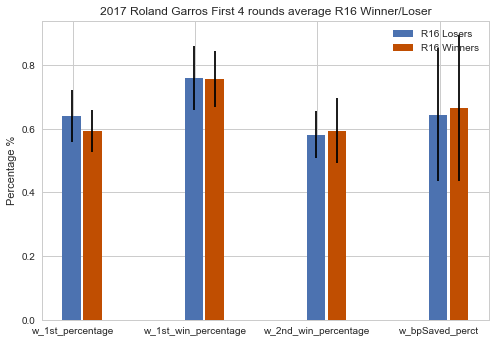

In [325]:

width = 0.15       # the width of the bars

plt.bar(np.arange(len(RG1stWeek_R16LosStat_dict))-0.01, RG1stWeek_R16LosStat_dict.values(),width, align='center',yerr=RG1stWeek_R16LosStat_std_dict.values())
plt.bar(np.arange(len(RG1stWeek_R16WinStat_dict))+width+0.01, RG1stWeek_R16WinStat_dict.values(),width,color=sns.xkcd_rgb['burnt orange'], align='center',yerr=RG1stWeek_R16WinStat_std_dict.values())
plt.xticks(range(len(RG1stWeek_R16LosStat_dict)), RG1stWeek_R16LosStat_dict.keys())
plt.ylabel('Percentage %')
plt.legend(['R16 Losers','R16 Winners'])
plt.title('2017 Roland Garros First 4 rounds average R16 Winner/Loser')
plt.show()


